In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images[0].shape

(28, 28)

In [6]:
import matplotlib.pyplot as plt

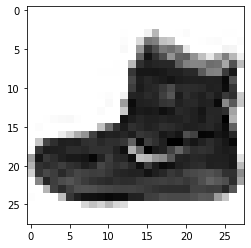

In [9]:
plt.imshow(train_images[0], cmap='gray_r')
plt.show()

In [10]:
train_labels[0]

9

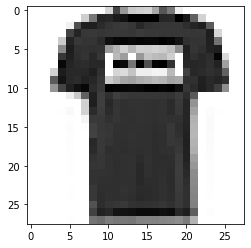

In [8]:
plt.imshow(train_images[1], cmap='gray_r')
plt.show()

In [9]:
train_labels[1]

0

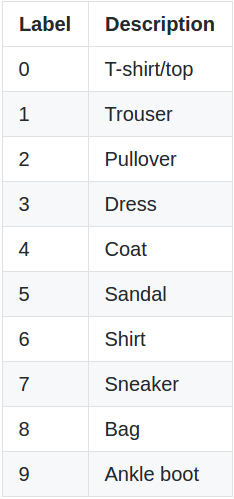

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [12]:
model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation = 'softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

In [15]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [16]:
from tensorflow.keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [17]:
from tensorflow.keras import optimizers
rmsprop = optimizers.RMSprop(learning_rate=0.001)

In [18]:
model.compile(optimizer=rmsprop,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [19]:
history = model.fit(train_images, train_labels_one_hot, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 7s 15ms/step - loss: 0.5523 - accuracy: 0.8063
Epoch 2/10
469/469 [==============================] - 6s 14ms/step - loss: 0.3810 - accuracy: 0.8612
Epoch 3/10
469/469 [==============================] - 6s 14ms/step - loss: 0.3362 - accuracy: 0.8743
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.3101 - accuracy: 0.8867
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.2908 - accuracy: 0.8929
Epoch 6/10
469/469 [==============================] - 6s 14ms/step - loss: 0.2765 - accuracy: 0.8976
Epoch 7/10
469/469 [==============================] - 10s 21ms/step - loss: 0.2632 - accuracy: 0.9031
Epoch 8/10
469/469 [==============================] - 10s 21ms/step - loss: 0.2521 - accuracy: 0.9064
Epoch 9/10
469/469 [==============================] - 7s 14ms/step - loss: 0.2408 - accuracy: 0.9102
Epoch 10/10
469/469 [==============================] - 6s 13ms/step - loss: 0.2338 - accu

In [20]:
model.evaluate(test_images, test_labels_one_hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.3691 - accuracy: 0.8739


[0.36911121010780334, 0.8738999962806702]

In [21]:
import matplotlib.pyplot as plt

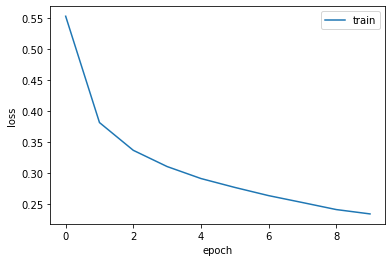

In [22]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'])
plt.show()

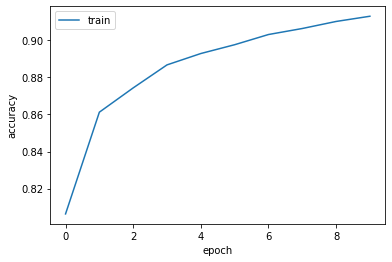

In [23]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train'])
plt.show()

In [23]:
model.predict(test_images[0:1])

array([[1.4844449e-09, 2.9001882e-13, 2.1493657e-10, 1.8121331e-11,
        4.9510992e-13, 2.0184794e-05, 1.3286316e-07, 5.0674833e-04,
        7.4840521e-08, 9.9947292e-01]], dtype=float32)

In [24]:
labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [26]:
import numpy as np

In [27]:
labels[np.argmax(model.predict(test_images[0:1]))]

'Ankle boot'